<a href="https://colab.research.google.com/github/183hardik/Technical_Analysis/blob/main/mean_reversion_META(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
import yfinance as yf

In [ ]:
asset = 'META'

In [ ]:
data = yf.download(asset,start='2018-10-01',end='2023-10-01',interval= '1d')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-01,163.029999,165.880005,161.259995,162.440002,162.440002,26407700
2018-10-02,161.580002,162.279999,158.669998,159.330002,159.330002,36031000
2018-10-03,160.000000,163.660004,159.529999,162.429993,162.429993,23109500
2018-10-04,161.460007,161.460007,157.350006,158.850006,158.850006,25739600
2018-10-05,159.210007,160.899994,156.199997,157.330002,157.330002,25744000
...,...,...,...,...,...,...
2023-09-25,295.640015,300.950012,293.700012,300.829987,300.829987,18987000
2023-09-26,297.660004,300.299988,296.010010,298.959991,298.959991,19417200
2023-09-27,300.450012,301.299988,286.790009,297.739990,297.739990,36429800


In [ ]:
def SMA(data,period = 30, column = 'Close'):
    return data[column].rolling(window= period).mean()

In [ ]:
data['SMA']= SMA(data,21)
data['simple returns']= data['Close'].pct_change()
data['log_returns'] = np.log(1 + data['simple returns'])
data['ratios'] = data['Close']/data['SMA']

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,SMA,simple returns,log_returns,ratios
Date,,,,,,,,,,
2018-10-01,163.029999,165.880005,161.259995,162.440002,162.440002,26407700,NaN,NaN,NaN,NaN
2018-10-02,161.580002,162.279999,158.669998,159.330002,159.330002,36031000,NaN,-0.019146,-0.019331,NaN
2018-10-03,160.000000,163.660004,159.529999,162.429993,162.429993,23109500,NaN,0.019456,0.019270,NaN
2018-10-04,161.460007,161.460007,157.350006,158.850006,158.850006,25739600,NaN,-0.022040,-0.022287,NaN
2018-10-05,159.210007,160.899994,156.199997,157.330002,157.330002,25744000,NaN,-0.009569,-0.009615,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-09-25,295.640015,300.950012,293.700012,300.829987,300.829987,18987000,299.344764,0.005851,0.005834,1.004962
2023-09-26,297.660004,300.299988,296.010010,298.959991,298.959991,19417200,299.985716,-0.006216,-0.006236,0.996581
2023-09-27,300.450012,301.299988,286.790009,297.739990,297.739990,36429800,300.341906,-0.004081,-0.004089,0.991337


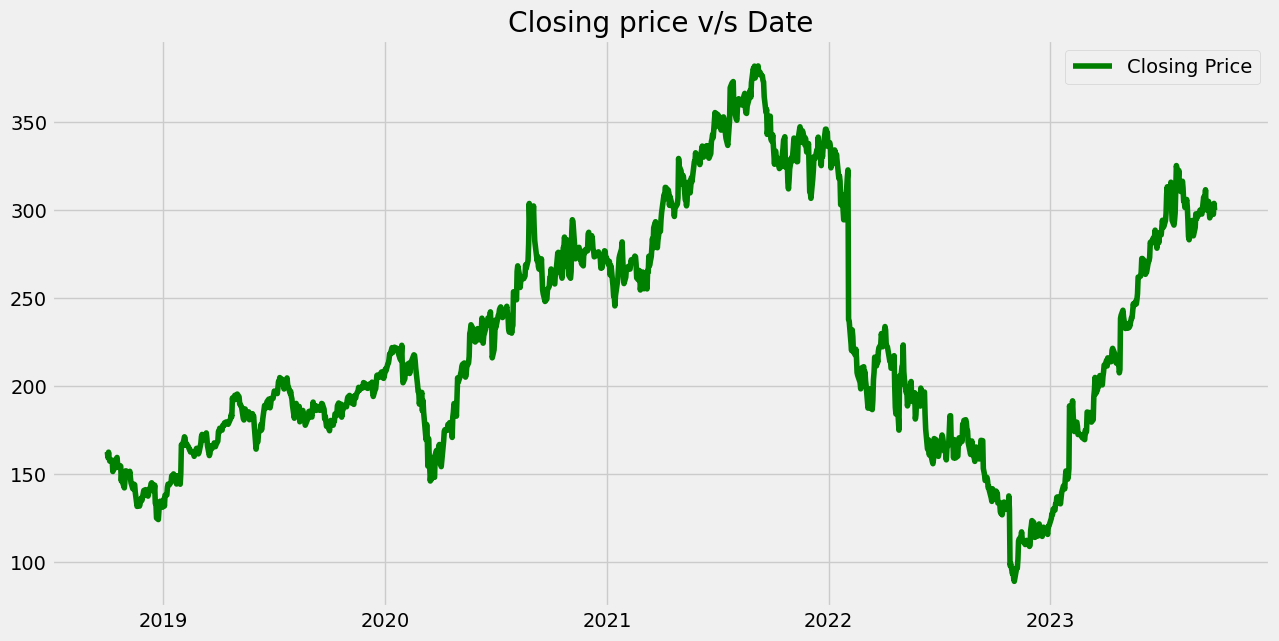

In [ ]:
plt.figure(figsize= (14,7))
plt.title('Closing price v/s Date')
plt.plot(data['Close'],color = 'green', label = 'Closing Price' )
plt.legend()

In [ ]:
data['ratios'].describe()

count    1238.000000
mean        1.006450
std         0.065366
min         0.728292
25%         0.976473
50%         1.013074
75%         1.044366
max         1.338279
Name: ratios, dtype: float64

In [ ]:
percentile = [5,20,50,80,97]
Ratios = data['ratios'].dropna()
percentile_values = np.percentile(Ratios,percentile)
percentile_values

array([0.90189431, 0.96534221, 1.01307351, 1.05147168, 1.11039581])

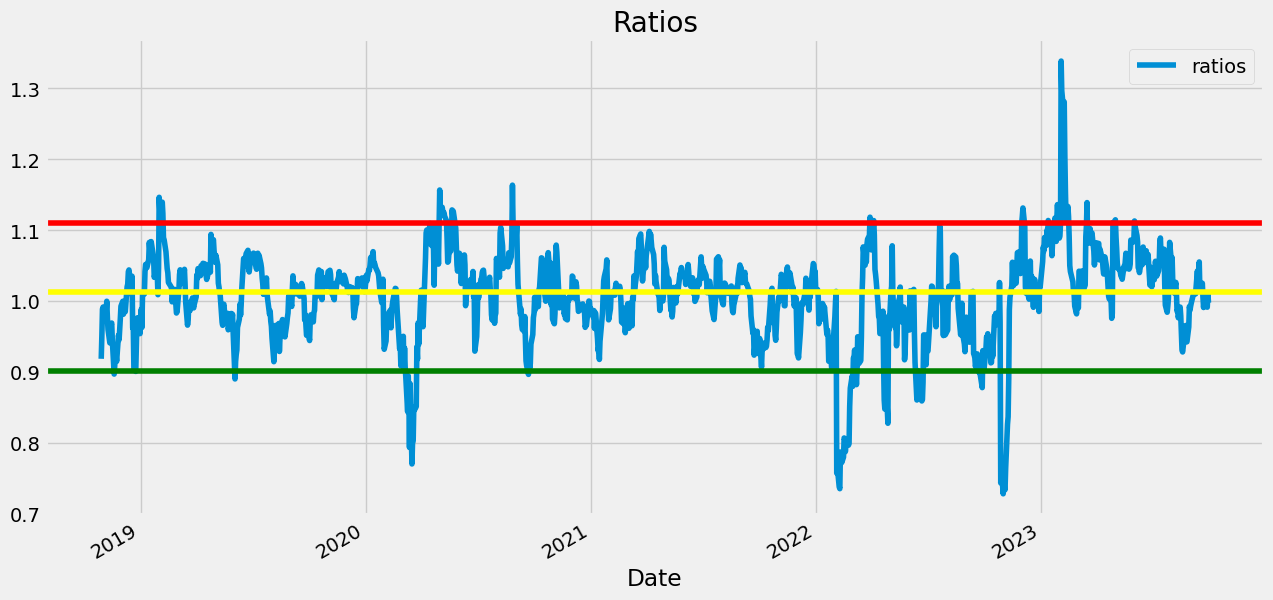

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Ratios')
Ratios.plot(legend = True)
plt.axhline(percentile_values[0], c= 'green', label ='15th percentile')
plt.axhline(percentile_values[2], c= 'yellow', label ='50th percentile')
plt.axhline(percentile_values[-1], c= 'red', label ='85th percentile')

In [ ]:
sell = percentile_values[-1]
buy = percentile_values[0]

data['Positions']= np.where((data.ratios > sell) , -1 , np.nan )
data['Positions']=np.where((data.ratios< buy)  , 1, data['Positions'])
data['Positions']= np.where((data.ratios<1.01)&(data.ratios>0.99) , 0, data['Positions'] )
data['Positions']= data['Positions'].ffill()

data['BUY'] = np.where(data.Positions == 1,data['Close'],np.nan)
data['SELL']= np.where(data.Positions == -1, data['Close'],np.nan)



In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,SMA,simple returns,log_returns,ratios,Positions,BUY,SELL
Date,,,,,,,,,,,,,
2018-10-01,163.029999,165.880005,161.259995,162.440002,162.440002,26407700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-02,161.580002,162.279999,158.669998,159.330002,159.330002,36031000,NaN,-0.019146,-0.019331,NaN,NaN,NaN,NaN
2018-10-03,160.000000,163.660004,159.529999,162.429993,162.429993,23109500,NaN,0.019456,0.019270,NaN,NaN,NaN,NaN
2018-10-04,161.460007,161.460007,157.350006,158.850006,158.850006,25739600,NaN,-0.022040,-0.022287,NaN,NaN,NaN,NaN
2018-10-05,159.210007,160.899994,156.199997,157.330002,157.330002,25744000,NaN,-0.009569,-0.009615,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,295.640015,300.950012,293.700012,300.829987,300.829987,18987000,299.344764,0.005851,0.005834,1.004962,0.0,NaN,NaN
2023-09-26,297.660004,300.299988,296.010010,298.959991,298.959991,19417200,299.985716,-0.006216,-0.006236,0.996581,0.0,NaN,NaN
2023-09-27,300.450012,301.299988,286.790009,297.739990,297.739990,36429800,300.341906,-0.004081,-0.004089,0.991337,0.0,NaN,NaN


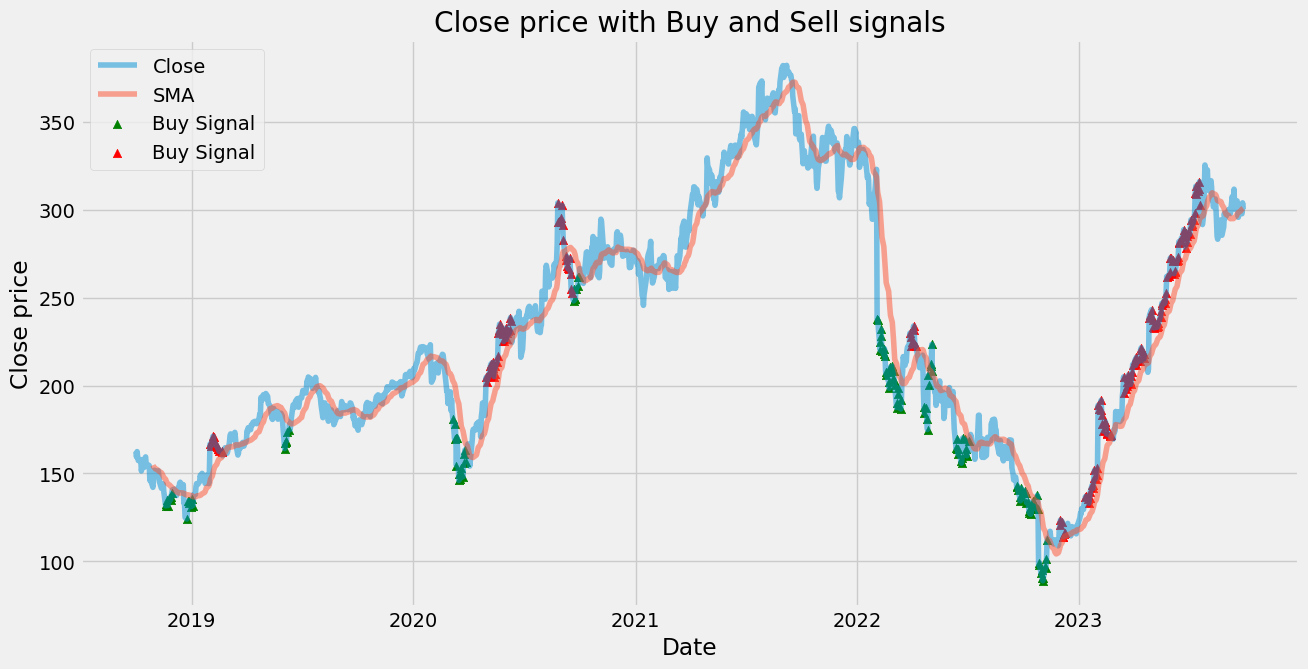

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Close price with Buy and Sell signals')
plt.plot(data['Close'],alpha = 0.5 , label = 'Close' )
plt.plot(data['SMA'],alpha = 0.5, label = 'SMA' )
plt.scatter(data.index,data['BUY'],color = 'green',label= 'Buy Signal', marker = '^',alpha = 1)
plt.scatter(data.index,data['SELL'],color = 'red',label= 'Buy Signal', marker = '^',alpha = 1)
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend()
plt.show()



In [ ]:
data['Strathegy_returns']  = data.Positions.shift(1) * data.log_returns
data['Strathegy_returns']

Date
2018-10-01    NaN
2018-10-02    NaN
2018-10-03    NaN
2018-10-04    NaN
2018-10-05    NaN
             ... 
2023-09-25    0.0
2023-09-26   -0.0
2023-09-27   -0.0
2023-09-28    0.0
2023-09-29   -0.0
Name: Strathegy_returns, Length: 1258, dtype: float64

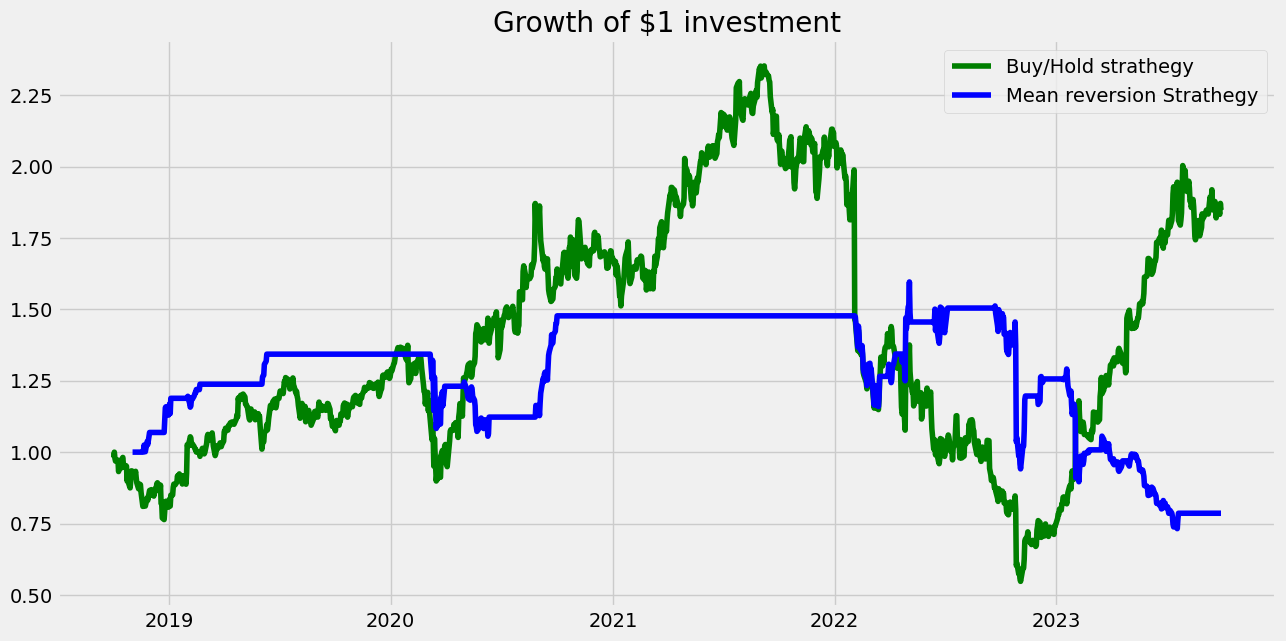

In [ ]:
plt.figure(figsize = (14,7))
plt.title('Growth of $1 investment')
plt.plot(np.exp(data['log_returns'].dropna()).cumprod(),color = 'green', label= "Buy/Hold strathegy")
plt.plot(np.exp(data['Strathegy_returns'].dropna()).cumprod(),color = 'blue', label= "Mean reversion Strathegy")
plt.legend()

In [ ]:
print('Mean erversion Strathegy Returns:',np.exp(data['Strathegy_returns'].dropna()).cumprod()[-1] - 1)

Mean erversion Strathegy Returns: -0.21404121139572085


In [ ]:
newdata = data.replace(-1.0 , "Open(short)" , inplace = True  )
newdata = data.replace(1.0 , "Open(long)" , inplace = True )
newdata = data.replace(0 , "Close")
newdata

,Open,High,Low,Close,Adj Close,Volume,SMA,simple returns,log_returns,ratios,Positions,BUY,SELL,Strathegy_returns
Date,,,,,,,,,,,,,,
2018-10-01,163.029999,165.880005,161.259995,162.440002,162.440002,26407700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-02,161.580002,162.279999,158.669998,159.330002,159.330002,36031000,NaN,-0.019146,-0.019331,NaN,NaN,NaN,NaN,NaN
2018-10-03,160.000000,163.660004,159.529999,162.429993,162.429993,23109500,NaN,0.019456,0.01927,NaN,NaN,NaN,NaN,NaN
2018-10-04,161.460007,161.460007,157.350006,158.850006,158.850006,25739600,NaN,-0.02204,-0.022287,NaN,NaN,NaN,NaN,NaN
2018-10-05,159.210007,160.899994,156.199997,157.330002,157.330002,25744000,NaN,-0.009569,-0.009615,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,295.640015,300.950012,293.700012,300.829987,300.829987,18987000,299.344764,0.005851,0.005834,1.004962,Close,NaN,NaN,Close
2023-09-26,297.660004,300.299988,296.010010,298.959991,298.959991,19417200,299.985716,-0.006216,-0.006236,0.996581,Close,NaN,NaN,Close
2023-09-27,300.450012,301.299988,286.790009,297.739990,297.739990,36429800,300.341906,-0.004081,-0.004089,0.991337,Close,NaN,NaN,Close


In [ ]:
mreturns = np.exp(data['Strathegy_returns'].dropna()).cumprod()[-1] - 1
print("Final portfolio return if $10,000 are invested :",10000*mreturns)

Final portfolio return if $10,000 are invested : -2140.4121139572085


In [ ]:
newdata.to_csv('Summary1.csv')

In [ ]:
print("The number of executed trades :")
newdata[(newdata['Positions'] == 'Close')&(newdata['Strathegy_returns'] != 'Close')]['Close'].count()

The number of executed trades :


17